1. We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])


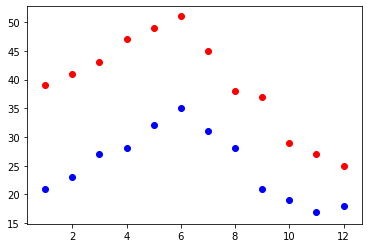

In [3]:
x_data = np.array([1,2,3,4,5,6,7,8,9,10,11,12])

# And plot it
plt.figure(figsize=(6, 4))
plt.scatter(x_data, Max, c='r')
plt.scatter(x_data, Min, c='b')

In [4]:
from scipy import optimize

def sin_func(x, a, b, c, d):
    return a * np.sin(b * x + c) + d

params1, params_covariance1 = optimize.curve_fit(sin_func, x_data, Max)
params2, params_covariance2 = optimize.curve_fit(sin_func, x_data, Min)

print(params1)
print(params2)

[12.1885671  -0.40912744  9.84915657 36.75343965]
[ 7.80370427 -0.54541757 10.87079172 25.27219289]


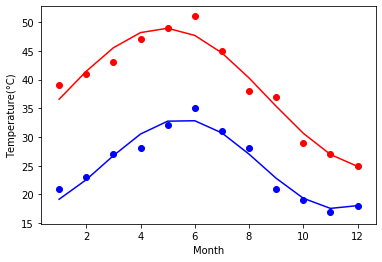

In [5]:
plt.figure(figsize=(6, 4))
plt.scatter(x_data, Max, c='r')
plt.scatter(x_data, Min, c='b')
plt.plot(x_data, sin_func(x_data, params1[0], params1[1], params1[2], params1[3]), c='r')
plt.plot(x_data, sin_func(x_data, params2[0], params2[1], params2[2], params2[3]), c='b')
plt.xlabel("Month")
plt.ylabel("Temperature(°C)")

plt.show()

2. Create a pie chart presenting the male/female proportion. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [6]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)
titanic = titanic.fillna(0)
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000
mean,2.293130,0.381679,23.859288,0.498473,0.384733,33.244646,14.853435
std,0.839913,0.485984,17.596499,1.041352,0.865295,51.735460,55.177911
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,7.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,0.000000,24.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,0.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [7]:
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,0.0,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,0,0.0,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,0,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,0,0.0,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,0.0000,1.0,0.0,2665,14.4542,0,C,0,0.0,0
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,0,C,0,304.0,0
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,0,C,0,0.0,0
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,0,S,0,0.0,0


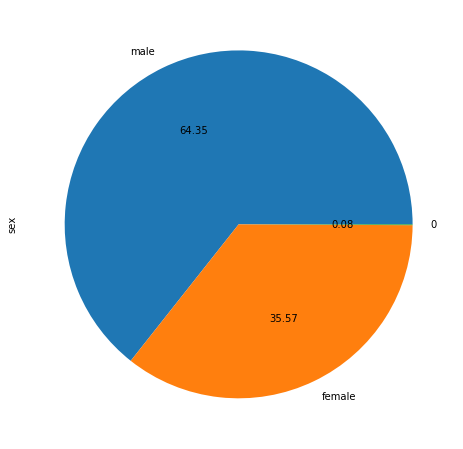

In [8]:
plt.figure(figsize=(16,8))
titanic['sex'].value_counts().plot(kind='pie', autopct='%.2f')

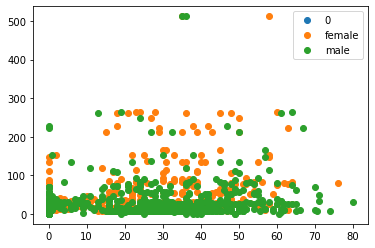

In [14]:
groups = titanic.groupby('sex')

for name, group in groups:
    plt.plot(group["age"], group["fare"], marker="o", linestyle="", label=name)
plt.legend()